In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Conv2D, 
    MaxPooling2D, 
    Dropout, 
    Activation, 
    GlobalAveragePooling2D, 
    Dense, 
    Dropout
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [2]:
data_dir = "./train_images"
directories = ["breakdancing", "calligraphy", "celebrating", "claypotterymaking", "climbingarope",
           "cookingoncampfire","eatingicecream","golfdriving","pushup","raisingeyebrows", "ridingscooter"]

In [3]:
def dataset(img_folder):
    images =[]
    labels=[]
    IMG_HEIGHT = 64
    IMG_WIDTH = 64
    for dir1 in directories:
        #count=0
        label = directories.index(dir1)
        image_file = os.path.join(img_folder, dir1)
        for i in os.listdir(image_file):
            image = cv2.imread(os.path.join(image_file, i))
            image = cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH))
            images.append(image)
            labels.append(label)
            '''
            count+=1
            if (count>20):
                break
            '''
    return images, labels

In [4]:
images, labels = dataset(data_dir)
images = np.array(images)
labels = np.array(labels)
print(images.shape, labels.shape)

(29600, 64, 64, 3) (29600,)


In [5]:
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.20, shuffle = True, random_state = 10)

In [10]:


def cnn_model(input_shape = (64,64,3)):
    inputs = Input(input_shape)
    c1 = Conv2D(64,3)(inputs)
    c1 = Activation('relu')(c1)
    p1 = MaxPooling2D(pool_size=(2,2))(c1)
    
    c2 = Conv2D(64,3)(p1)
    c2 = Activation('relu')(c2)
    p2 = MaxPooling2D(pool_size=(2,2))(c2) 
    
    c3 = Conv2D(64,3)(p2)
    c3 = Activation('relu')(c3)
    p3 = MaxPooling2D(pool_size=(2,2))(c3)
    
    g1 = GlobalAveragePooling2D()(p3)
    
    d1 = Dense(256)(g1)
    d1 = Dropout(0.2)(d1)
    
    d2 = Dense(11, activation='softmax')(d1)
    
    model = Model(inputs = inputs, outputs = d2)
    
    model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
    return model

In [11]:
model = cnn_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0     

2021-10-12 21:27:32.314650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/usr/local/lib/python3.8/dist-packages/keras/backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Epoch 1/10


2021-10-12 21:27:33.879458: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


370/370 [==============================] - 7s 8ms/step - loss: 1.4119 - accuracy: 0.6291 - val_loss: 0.2580 - val_accuracy: 0.9301
Epoch 2/10
370/370 [==============================] - 3s 7ms/step - loss: 0.2160 - accuracy: 0.9321 - val_loss: 0.0862 - val_accuracy: 0.9784
Epoch 3/10
370/370 [==============================] - 3s 7ms/step - loss: 0.0874 - accuracy: 0.9711 - val_loss: 0.0489 - val_accuracy: 0.9806
Epoch 4/10
370/370 [==============================] - 3s 7ms/step - loss: 0.0551 - accuracy: 0.9809 - val_loss: 0.0658 - val_accuracy: 0.9762
Epoch 5/10
370/370 [==============================] - 3s 7ms/step - loss: 0.0620 - accuracy: 0.9776 - val_loss: 0.2630 - val_accuracy: 0.9081
Epoch 6/10
370/370 [==============================] - 3s 7ms/step - loss: 0.0562 - accuracy: 0.9785 - val_loss: 0.0232 - val_accuracy: 0.9873
Epoch 7/10
370/370 [==============================] - 3s 7ms/step - loss: 0.0309 - accuracy: 0.9866 - val_loss: 0.0451 - val_accuracy: 0.9757
Epoch 8/10
370/37

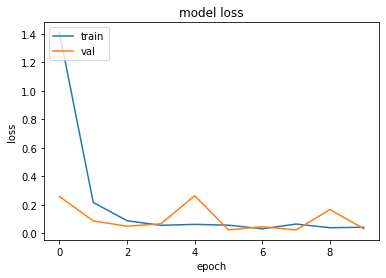

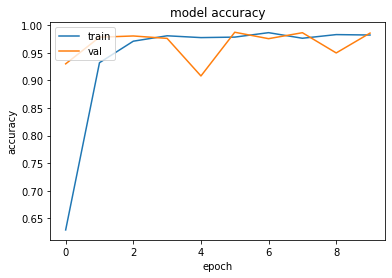

In [12]:
history = model.fit(train_images, train_labels, validation_data = (val_images, val_labels), batch_size=64, epochs=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#tensorboard

In [13]:
model.save('myModel.h5')

In [14]:
from pytube import YouTube

In [16]:
yt = YouTube('https://www.youtube.com/watch?v=1Yxfuvz7zzU')
yt = yt.streams.filter(file_extension='mp4').first()
yt.download("./video")

'/home/madil/dlmed/problems/human_activity/./video/break dance 《RESPECT 》VIDEOS😱.mp4'

In [17]:
import cv2

In [18]:
import os

In [27]:
cap= cv2.VideoCapture('./video/break dance 《RESPECT 》VIDEOS😱.mp4')
i=0
folder = './video/data'
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    file_name = 'data'+str(i)+'.jpg'
    path = os.path.join(folder, file_name)
    cv2.imwrite(path,frame)
    i+=1
 
cap.release()

In [28]:
def dataset(img_folder):
    images =[]
  # labels =[]
    IMG_HEIGHT = 64
    IMG_WIDTH = 64
    for i in os.listdir(img_folder):
        image = cv2.imread(os.path.join(img_folder, i))
        image = cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH))
        images.append(image)
       # labels.append('breakdancing')    
    return images

In [29]:
import numpy as np

In [30]:
img_folder = './video/data'
images = dataset(img_folder)
images = np.array(images)
print(images.shape)

(373, 64, 64, 3)


In [31]:
model.load_weights("myModel.h5")

In [32]:
prediction = np.array(model.predict(images))

In [35]:
print(prediction.shape)

(373, 11)


In [47]:
prediction_classes = np.argmax(prediction, axis=1)
most_common_class = directories[np.argmax(np.bincount(prediction_classes))]
print(most_common_class)

celebrating


In [48]:
def download_video(link, download_path, output_filename):
    yt = YouTube(link)
    yt = yt.streams.filter(file_extension='mp4').first()
    yt.download(output_path=download_path, filename=output_filename)

def convert_video_to_images(download_path, output_filename, images_dir='data'):
    cap= cv2.VideoCapture(os.path.join(download_path, output_filename))
    i=0
    folder = os.path.join(download_path, images_dir)
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        file_name = images_dir+str(i)+'.jpg'
        path = os.path.join(folder, file_name)
        cv2.imwrite(path,frame)
        i+=1
    
    cap.release()

def predict_video_class_from_youtube(video_link, download_path, model, output_filename='video.mp4', model_name="myModel.h5", images_dir='data'):
    download_video(video_link, download_path, output_filename)
    convert_video_to_images(download_path, output_filename, images_dir=images_dir)
    img_folder = os.path.join(download_path, images_dir)
    images = dataset(img_folder)
    images = np.array(images)
    print(images.shape)
    model.load_weights(model_name)
    prediction = np.array(model.predict(images))
    prediction_classes = np.argmax(prediction, axis=1)
    most_common_class = directories[np.argmax(np.bincount(prediction_classes))]
    return most_common_class
    

In [50]:
print(predict_video_class_from_youtube("https://www.youtube.com/watch?v=1Yxfuvz7zzU", "./video", model))

(373, 64, 64, 3)
celebrating
